## Análisis del arbolado en espacios verdes en Capital Federal, Buenos Aires, Argentina

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
arboles = pd.read_csv('arbolado-en-espacios-verdes.csv')

In [11]:
arboles.head()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,-58.477564,-34.645015,1,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.305719,98253.300738
1,-58.477559,-34.645047,2,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.751564,98249.733979
2,-58.477551,-34.645091,3,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98693.494639,98244.829684
3,-58.478129,-34.644567,4,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98640.439091,98302.938142
4,-58.478121,-34.644598,5,17,50,0,65,Ombú,Phytolacca dioica,Árbol Latifoliado Caducifolio,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Fitolacáceas,Phytolacca,Nativo/Autóctono,98641.182166,98299.519997


In [12]:
arboles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51502 entries, 0 to 51501
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   long        51502 non-null  float64
 1   lat         51502 non-null  float64
 2   id_arbol    51502 non-null  int64  
 3   altura_tot  51502 non-null  int64  
 4   diametro    51502 non-null  int64  
 5   inclinacio  51502 non-null  int64  
 6   id_especie  51502 non-null  int64  
 7   nombre_com  51502 non-null  object 
 8   nombre_cie  51502 non-null  object 
 9   tipo_folla  51502 non-null  object 
 10  espacio_ve  51502 non-null  object 
 11  ubicacion   50529 non-null  object 
 12  nombre_fam  51502 non-null  object 
 13  nombre_gen  51502 non-null  object 
 14  origen      51502 non-null  object 
 15  coord_x     51502 non-null  float64
 16  coord_y     51502 non-null  float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.7+ MB


### Distribución de las alturas de los árboles en espacios verdes de CABA

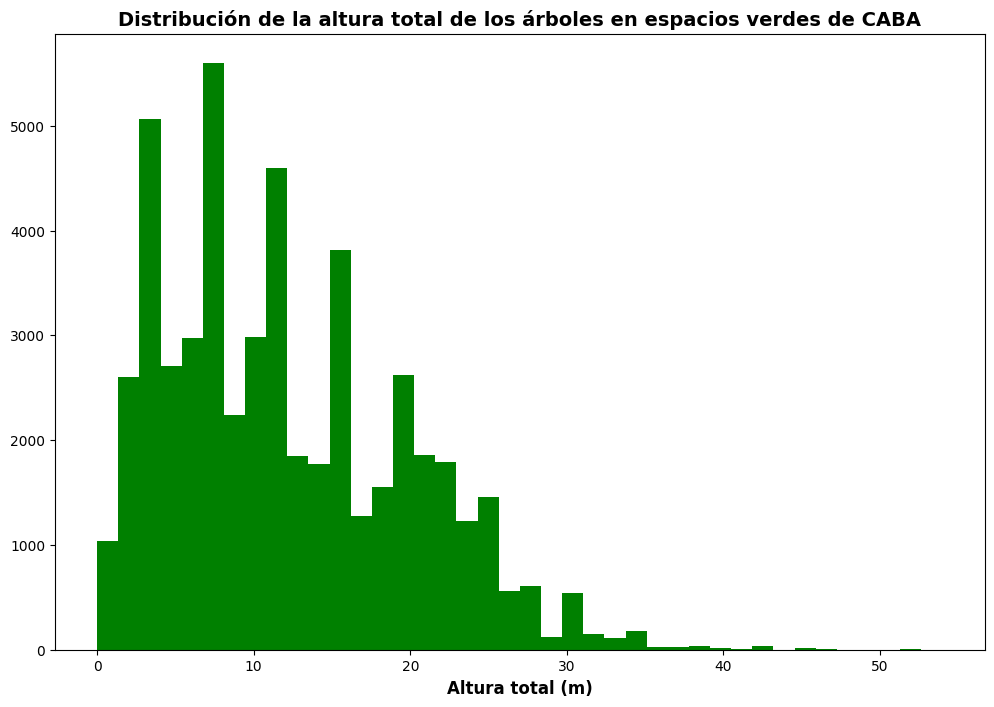

In [28]:
plt.figure(figsize=(12,8))

plt.hist(arboles['altura_tot'], color='green', bins=40)
plt.title('Distribución de la altura total de los árboles en espacios verdes de CABA', fontsize=14, fontweight='bold')
plt.xlabel('Altura total (m)', fontsize=12, fontweight='semibold')
plt.show()

### Top 20 especies por cantidad es espacios verdes de CABA

In [15]:
especies_count = arboles['nombre_com'].value_counts().head(20).reset_index()
especies_count.columns = ['especie', 'cantidad']
especies_count['porcentaje'] = (especies_count['cantidad'] / especies_count['cantidad'].sum() * 100).round(1)
especies_count['label'] = especies_count.apply(
    lambda x: f"<b>{x['especie']}</b><br>{x['cantidad']:,} árboles<br>{x['porcentaje']}%",
    axis=1
)
fig = px.treemap(
    especies_count,
    path=['label'],
    values='cantidad',
    title='Top 20 Especies de árboles en CABA',
    color='cantidad',
    color_continuous_scale='Viridis'
)
fig.update_traces(
    textfont=dict(size=12, color='white'),
    marker_line=dict(width=2, color='white'),
     hovertemplate='<b>%{label}</b><extra></extra>'
)
fig.update_layout(width=1000, height=700)
fig.show()

### Distribución de alturas de las 10 especies más comunes en espacios verdes de CABA

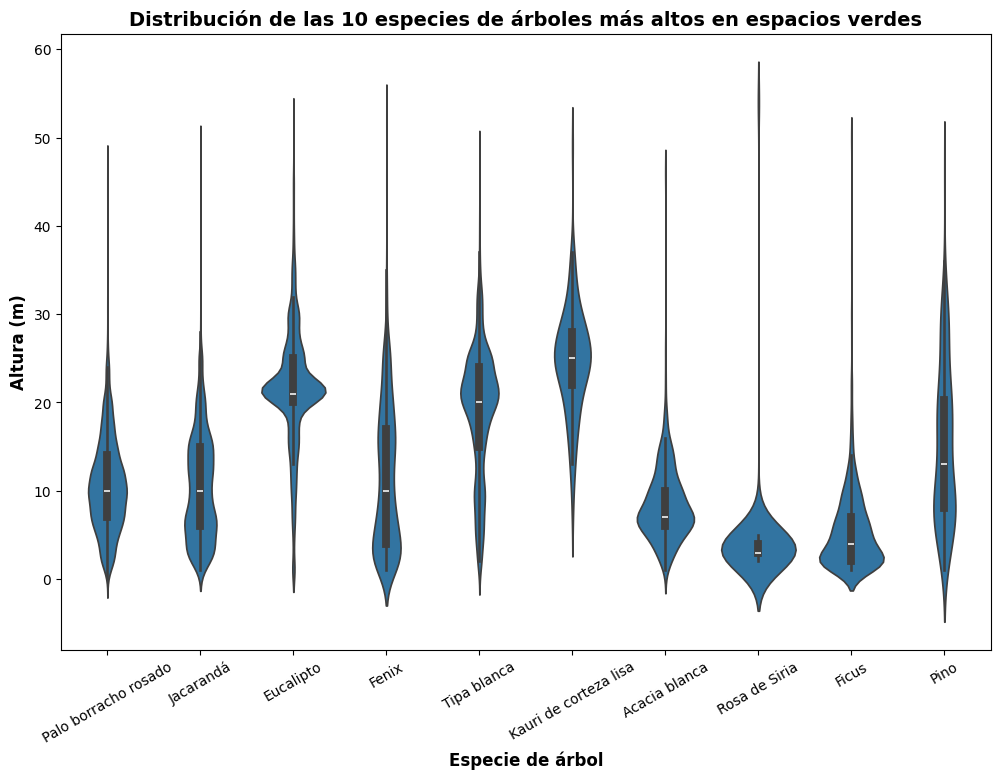

In [3]:
top10_alt_values = arboles.groupby('nombre_com')['altura_tot'].max().sort_values(ascending=False).head(10).reset_index()['nombre_com'].values

top10_alt = arboles[arboles['nombre_com'].isin(top10_alt_values)]

plt.figure(figsize=(12,8))
sns.violinplot(data=top10_alt, x='nombre_com', y='altura_tot')
plt.title('Distribución de las 10 especies de árboles más altos en espacios verdes', fontsize=14, fontweight='bold')
plt.xlabel('Especie de árbol', fontsize=12, fontweight='semibold')
plt.xticks(rotation=30)
plt.ylabel('Altura (m)', fontsize=12, fontweight='semibold')
plt.show()

### Distribución del diámetro de los árboles en espacios verdes de CABA

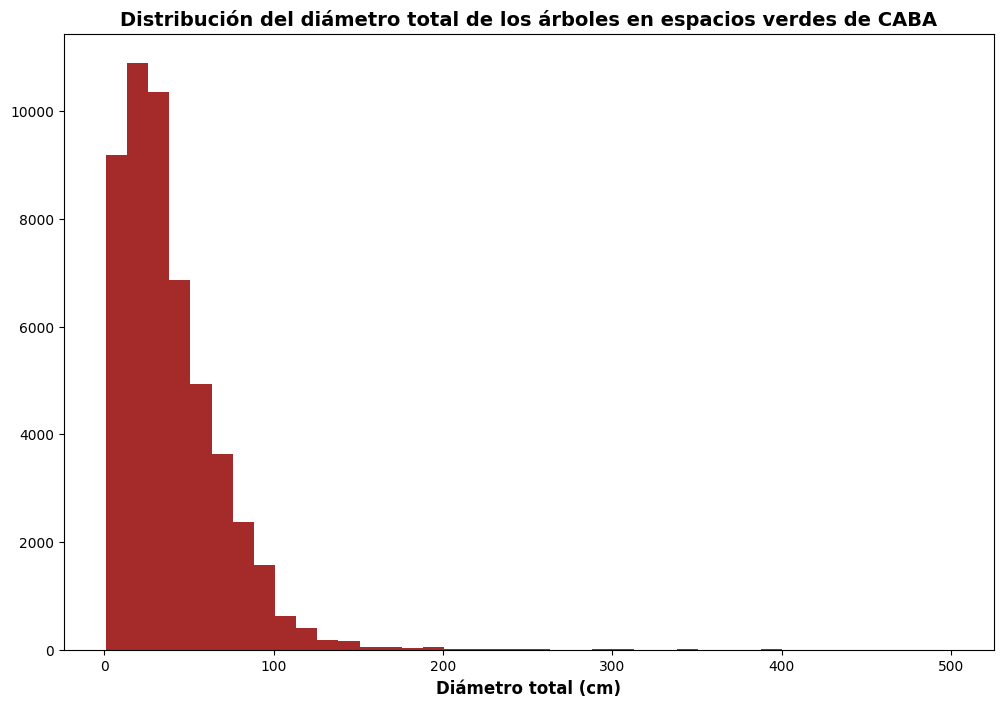

In [36]:
plt.figure(figsize=(12,8))

plt.hist(arboles['diametro'], color='brown', bins=40)
plt.title('Distribución del diámetro total de los árboles en espacios verdes de CABA', fontsize=14, fontweight='bold')
plt.xlabel('Diámetro total (cm)', fontsize=12, fontweight='semibold')
plt.show()

### Distribución de alturas de los árboles por origen

C:\Users\juanc\AppData\Local\Temp\ipykernel_66092\3918653253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=arboles_nativos_exoticos, x='origen', y='altura_tot', palette='Set2', ax=ax)


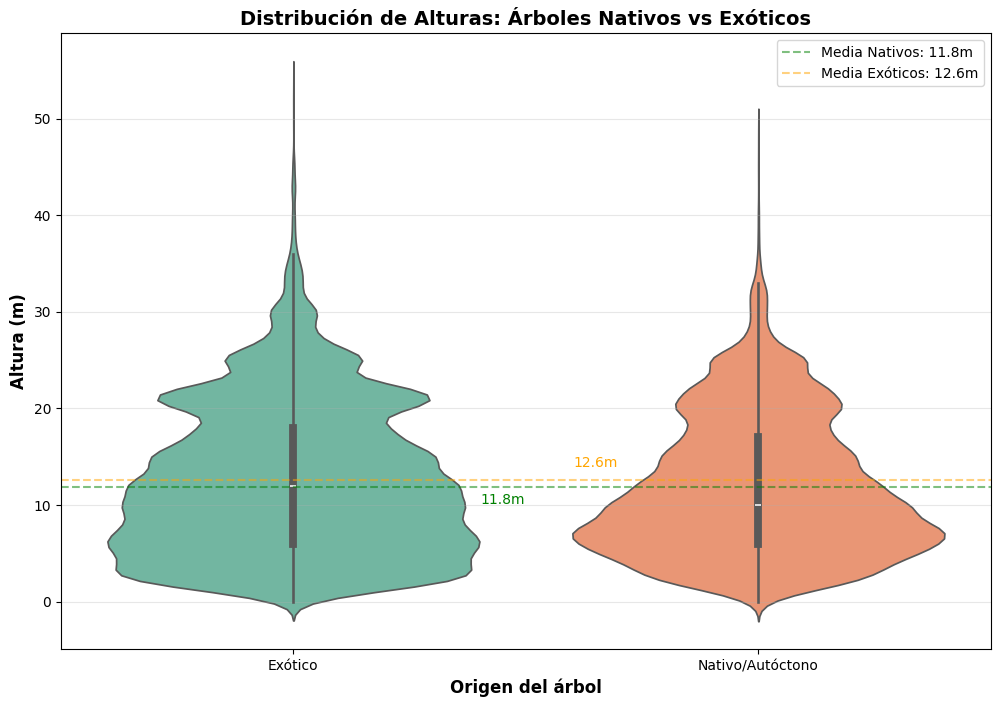

<Figure size 640x480 with 0 Axes>

In [119]:
arboles_nativos_exoticos = arboles[arboles['origen'] != 'No Determinado']

fig, ax = plt.subplots(figsize=(12, 8))


sns.violinplot(data=arboles_nativos_exoticos, x='origen', y='altura_tot', palette='Set2', ax=ax)
nativos_mean = arboles[arboles['origen']=='Nativo/Autóctono']['altura_tot'].mean()
exoticos_mean = arboles[arboles['origen']=='Exótico']['altura_tot'].mean()
ax.axhline(y=nativos_mean, color='green', linestyle='--', 
           alpha=0.5, label=f'Media Nativos: {nativos_mean:.1f}m')
ax.axhline(y=exoticos_mean, color='orange', linestyle='--', 
           alpha=0.5, label=f'Media Exóticos: {exoticos_mean:.1f}m')
ax.text(0.45, nativos_mean - 2 , f'{nativos_mean:.1f}m', ha='center', va='bottom', color='green')
ax.text(0.65, exoticos_mean + 1, f'{exoticos_mean:.1f}m', ha='center', va='bottom', color='orange')
plt.title('Distribución de Alturas: Árboles Nativos vs Exóticos', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='y')
plt.xlabel('Origen del árbol', fontsize=12, fontweight='semibold')
plt.ylabel('Altura (m)', fontsize=12, fontweight='semibold')
plt.legend()
plt.show()
plt.tight_layout()

### Top 5 más altos y bajos por especie en espacios verdes de CABA

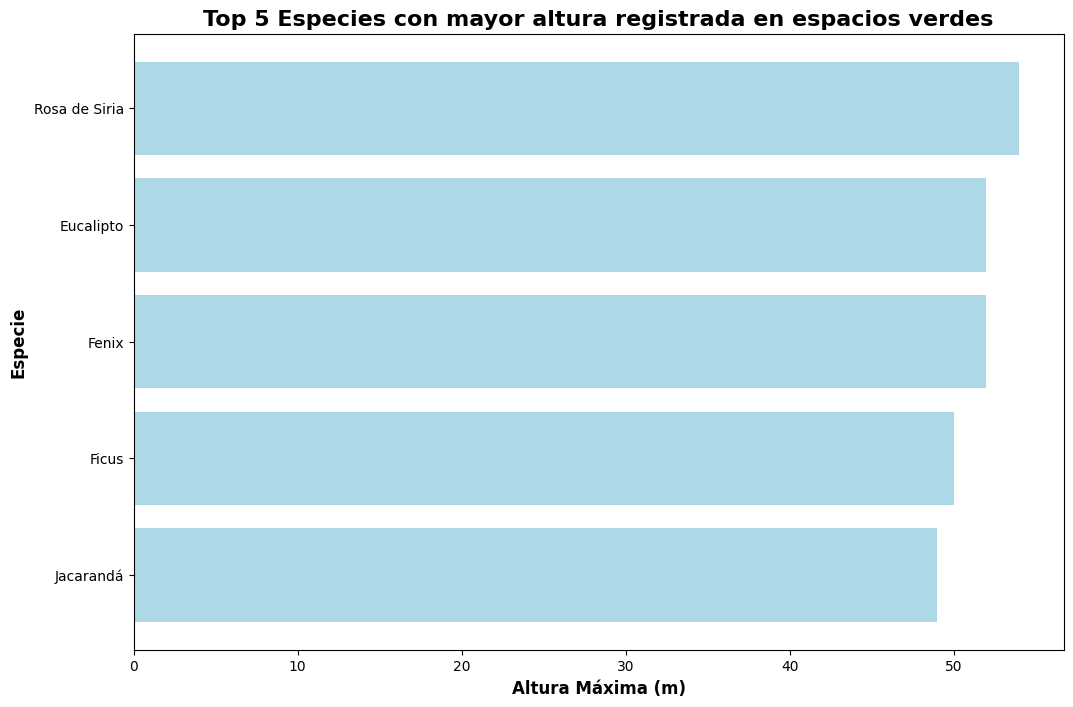

In [4]:
top5_altos = arboles.groupby('nombre_com')['altura_tot'].max().sort_values(ascending=False).head().reset_index()

plt.figure(figsize=(12,8))

plt.barh(top5_altos['nombre_com'], top5_altos['altura_tot'], color='lightblue')
plt.title('Top 5 Especies con mayor altura registrada en espacios verdes', fontweight='bold', fontsize=16)
plt.xlabel('Altura Máxima (m)', fontweight='bold', fontsize=12)
plt.ylabel('Especie', fontweight='bold', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

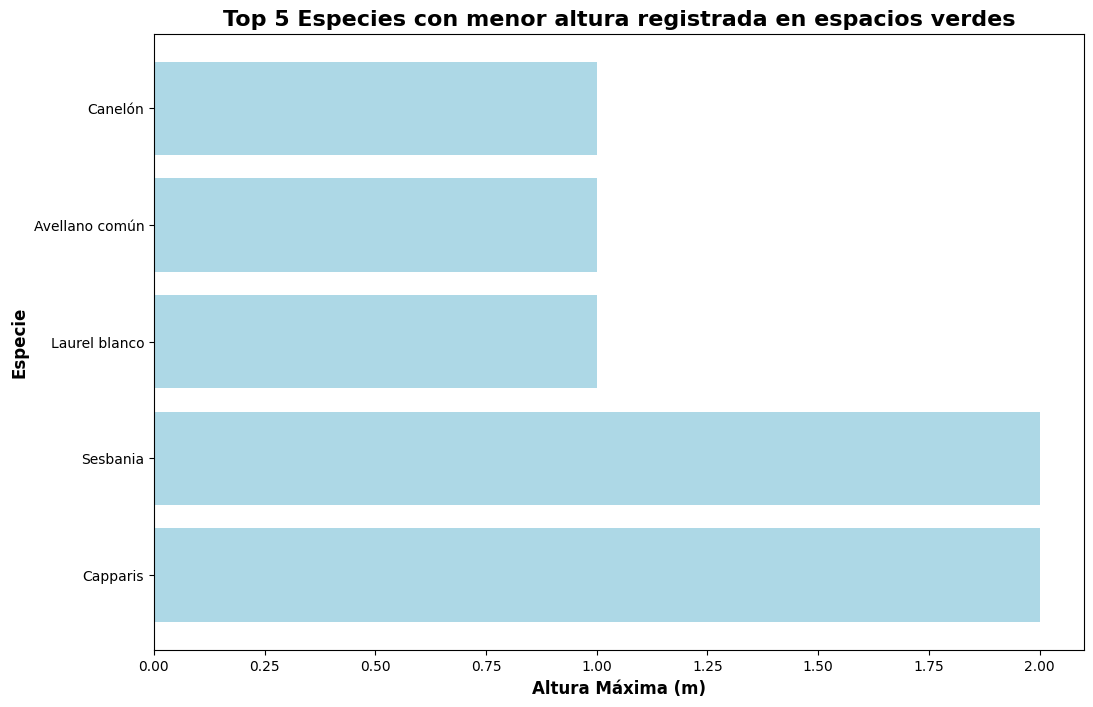

In [5]:
top5_bajos = arboles.groupby('nombre_com')['altura_tot'].max().sort_values(ascending=False).tail().reset_index()

plt.figure(figsize=(12,8))

plt.barh(top5_bajos['nombre_com'], top5_bajos['altura_tot'], color='lightblue')
plt.title('Top 5 Especies con menor altura registrada en espacios verdes', fontweight='bold', fontsize=16)
plt.xlabel('Altura Máxima (m)', fontweight='bold', fontsize=12)
plt.ylabel('Especie', fontweight='bold', fontsize=12)
plt.show()

### Top 5 mayor y menor diámetro en espacios verdes de CABA

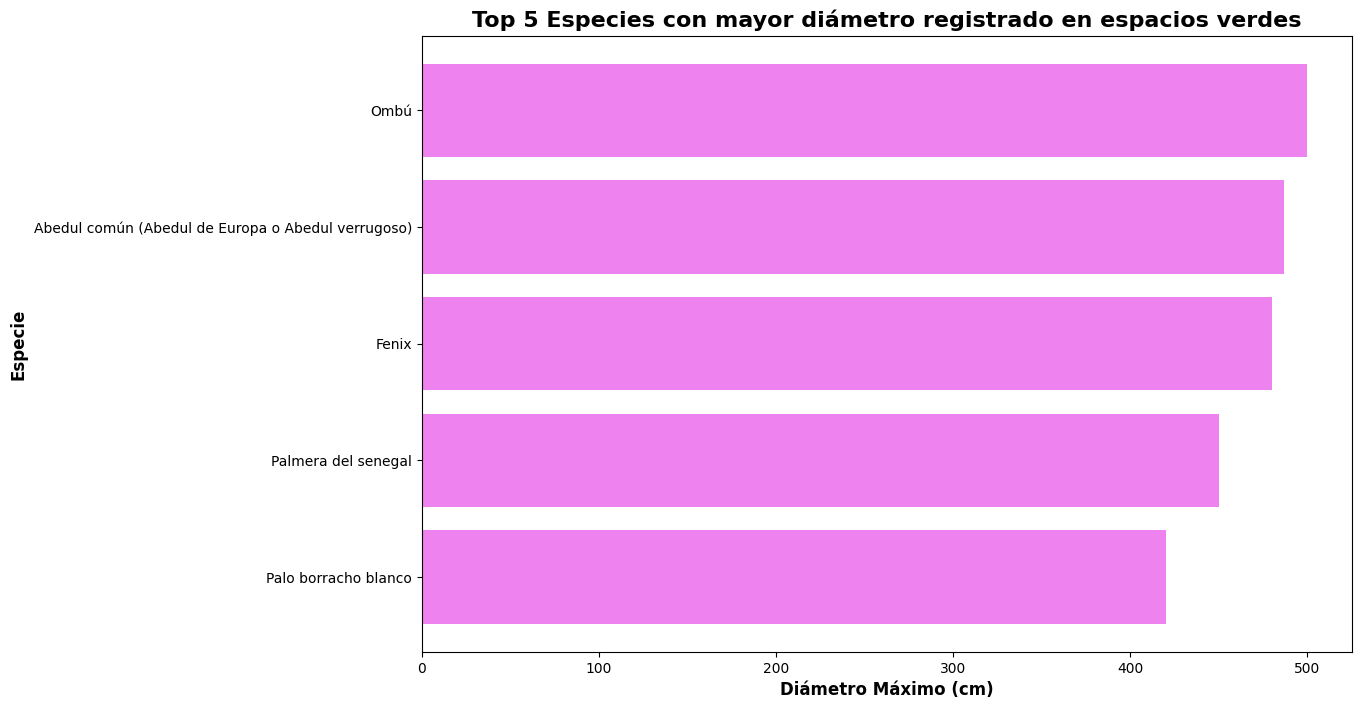

In [6]:
top5_may_diam = arboles.groupby('nombre_com')['diametro'].max().sort_values(ascending=False).head().reset_index()

plt.figure(figsize=(12,8))

plt.barh(top5_may_diam['nombre_com'], top5_may_diam['diametro'], color='violet')
plt.title('Top 5 Especies con mayor diámetro registrado en espacios verdes', fontweight='bold', fontsize=16)
plt.xlabel('Diámetro Máximo (cm)', fontweight='bold', fontsize=12)
plt.ylabel('Especie', fontweight='bold', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

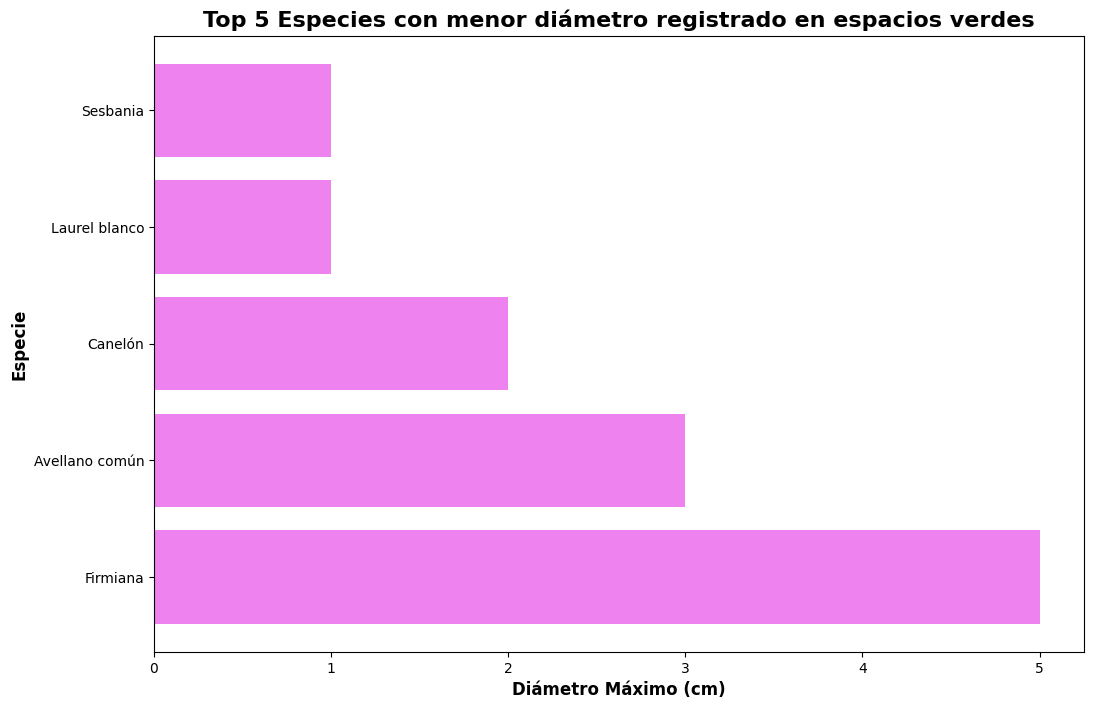

In [7]:
top5_men_diam = arboles.groupby('nombre_com')['diametro'].max().sort_values(ascending=False).tail().reset_index()

plt.figure(figsize=(12,8))

plt.barh(top5_men_diam['nombre_com'], top5_men_diam['diametro'], color='violet')
plt.title('Top 5 Especies con menor diámetro registrado en espacios verdes', fontweight='bold', fontsize=16)
plt.xlabel('Diámetro Máximo (cm)', fontweight='bold', fontsize=12)
plt.ylabel('Especie', fontweight='bold', fontsize=12)
plt.show()

### Cantidad de arboles de las 10 especies más comunes en espacios verdes de CABA

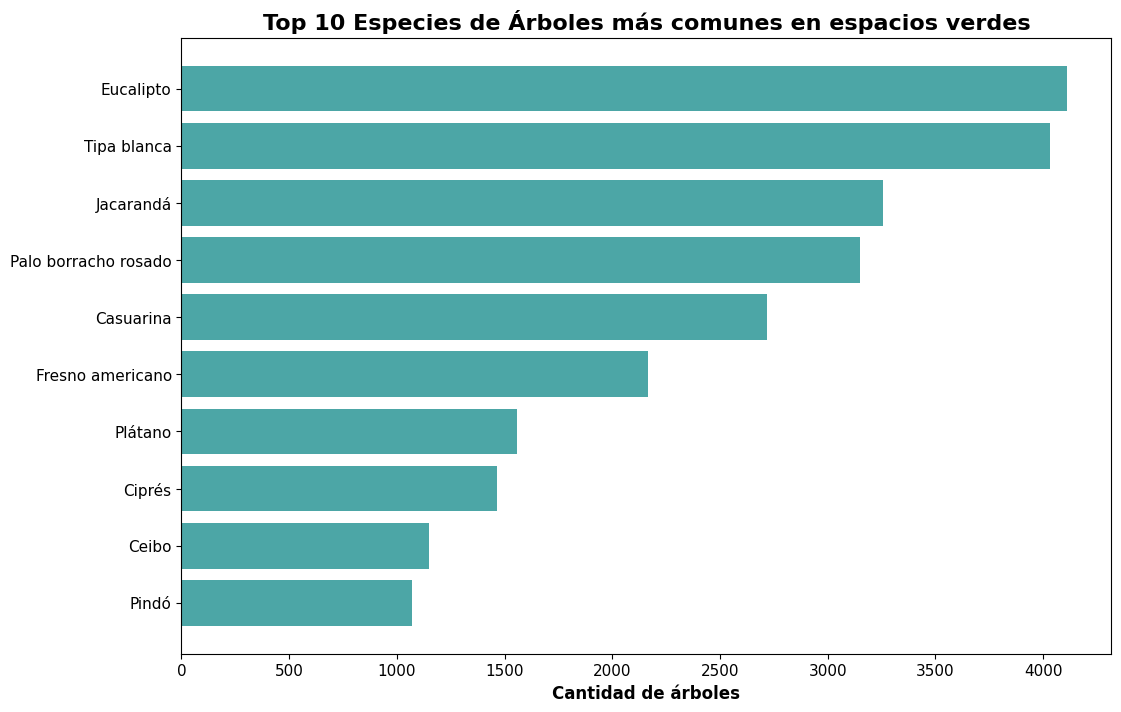

In [8]:
top_10_especies = arboles['nombre_com'].value_counts().head(10).reset_index().sort_values(by='count')
plt.figure(figsize=(12, 8))
plt.barh(top_10_especies['nombre_com'], top_10_especies['count'], color='teal', alpha=0.7)
plt.title('Top 10 Especies de Árboles más comunes en espacios verdes', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de árboles', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### Mapas coropléticos

In [10]:
comunas_gdf = gpd.read_file('comunas_wgs84.shp')

puntos_clave = {
    1:  Point(-58.38, -34.60), 
    2:  Point(-58.39, -34.58), 
    3:  Point(-58.40, -34.61), 
    4:  Point(-58.39, -34.64), 
    5:  Point(-58.42, -34.61), 
    6:  Point(-58.44, -34.61), 
    7:  Point(-58.46, -34.63), 
    8:  Point(-58.46, -34.67), 
    9:  Point(-58.50, -34.65), 
    10: Point(-58.50, -34.63), 
    11: Point(-58.50, -34.60), 
    12: Point(-58.49, -34.56), 
    13: Point(-58.45, -34.55), 
    14: Point(-58.41, -34.57), 
    15: Point(-58.45, -34.59) 
}


def identificar_comuna(poligono):
    for n_comuna, punto in puntos_clave.items():
        if poligono.contains(punto):
            return n_comuna
    return None


comunas_gdf['comuna'] = comunas_gdf['geometry'].apply(identificar_comuna)
comunas_gdf.loc[0, 'comuna'] = 2
comunas_gdf['comuna'] = comunas_gdf['comuna'].astype(int)
comunas_gdf



,geometry,comuna
0,"POLYGON ((-58.38 -34.57002, -58.38002 -34.5703...",2
1,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6
2,"POLYGON ((-58.48834 -34.62016, -58.4882 -34.62...",10
3,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5...",11
4,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5...",12
5,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5...",14
6,"POLYGON ((-58.42602 -34.59661, -58.42484 -34.5...",15
7,"POLYGON ((-58.44033 -34.54022, -58.44032 -34.5...",13
8,"POLYGON ((-58.38864 -34.63373, -58.38864 -34.6...",4
9,"POLYGON ((-58.43333 -34.60267, -58.43314 -34.6...",5


#### Distribución de alturas por comuna en espacios verdes de CABA

c:\Users\juanc\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


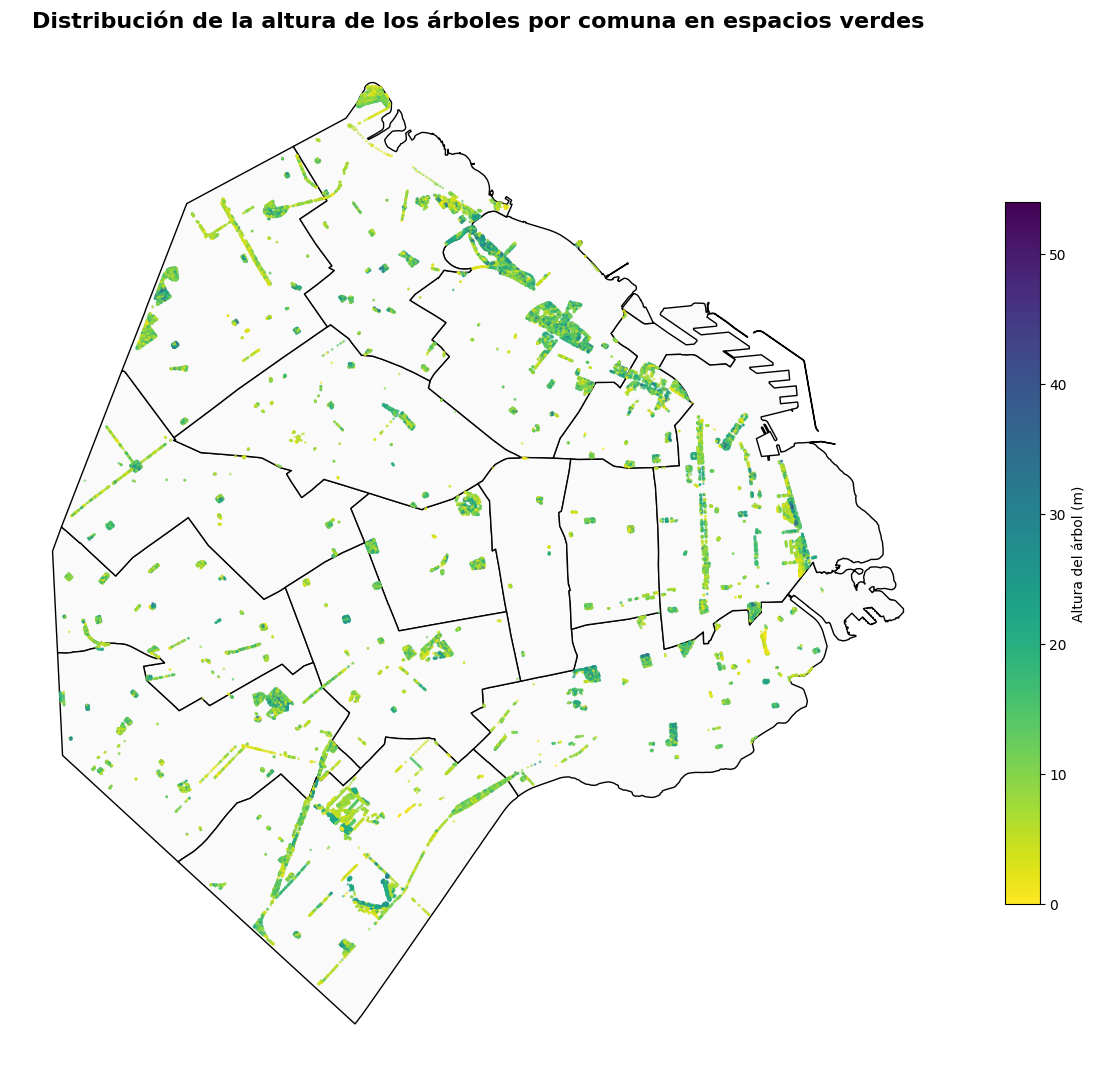

In [69]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(arboles["long"], arboles["lat"])]
arboles_gdf = gpd.GeoDataFrame(arboles, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize=(12, 12))

comunas_gdf.plot(ax=ax, color="#fafafa", edgecolor='black', linewidth=1)

arboles_gdf.plot(
    ax=ax,
    column='altura_tot',  
    cmap='viridis_r',    
    markersize=1,        
    alpha=0.5,          
    legend=True,          
    legend_kwds={'label': "Altura del árbol (m)", 'shrink': 0.6}
)

plt.title('Distribución de la altura de los árboles por comuna en espacios verdes', fontsize=16, fontweight='bold')
plt.axis('off') 
plt.tight_layout()
plt.show()

#### Calidad del espacio verde por comuna 

Métrica para indicar la calidad del espacio

In [71]:
arboles_gdf['arbol_vol'] = arboles_gdf['altura_tot'] * arboles_gdf['diametro']

C:\Users\juanc\AppData\Local\Temp\ipykernel_66092\1649992235.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: None

  arboles_comuna = gpd.sjoin(arboles_gdf, comunas_gdf[['geometry', 'comuna']], how="inner", predicate="within")


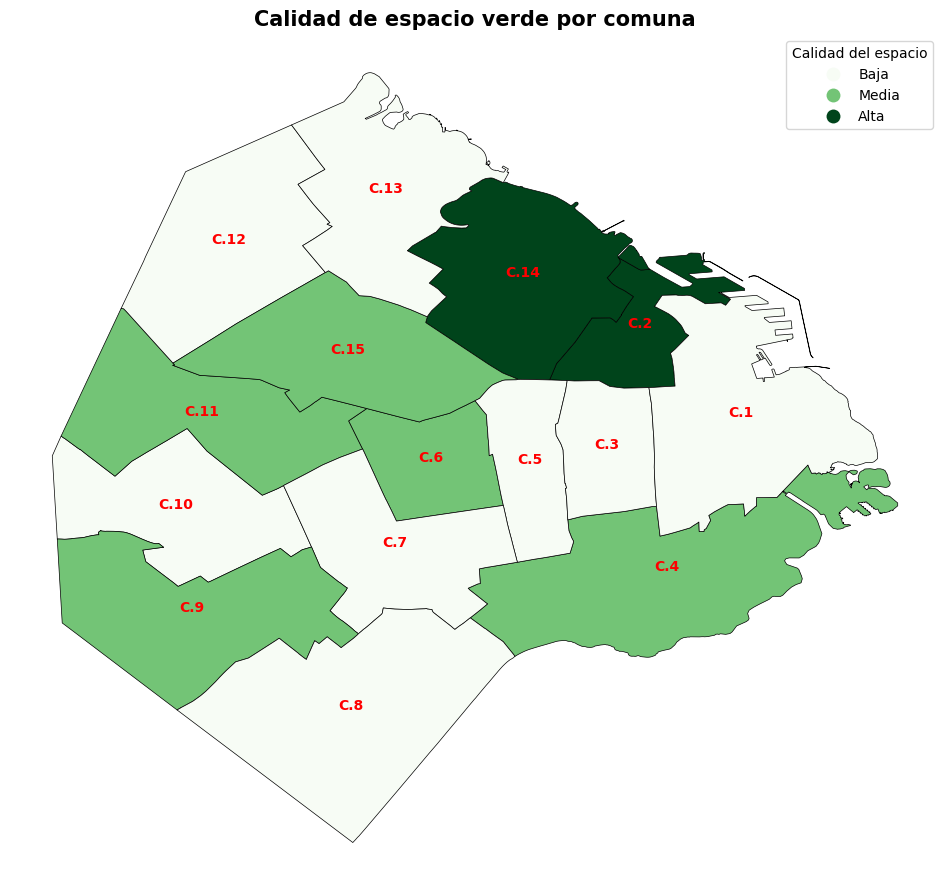

In [72]:
arboles_comuna = gpd.sjoin(arboles_gdf, comunas_gdf[['geometry', 'comuna']], how="inner", predicate="within")

metrica_vol = arboles_comuna.groupby('comuna')['arbol_vol'].mean().reset_index()
metrica_vol.rename(columns={'arbol_vol': 'calidad_promedio'}, inplace=True)
mapa_final = comunas_gdf.merge(metrica_vol, on='comuna', how='left')
mapa_final['nivel_calidad'] = pd.cut(mapa_final['calidad_promedio'], 
                                     bins=3, 
                                     labels=["Baja", "Media", "Alta"])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

mapa_final.plot(column='nivel_calidad',   
                cmap='Greens',           
                categorical=True,         
                legend=True,              
                edgecolor='black',
                linewidth=0.5,
                legend_kwds={'loc': 'upper right', 'title': 'Calidad del espacio'},
                ax=ax)

for x, y, label in zip(mapa_final.geometry.centroid.x, mapa_final.geometry.centroid.y, mapa_final['comuna']):
    ax.text(x, y, f"C.{label}", fontsize=10, ha='center', fontweight='bold', color='red')

ax.set_axis_off()
ax.set_title("Calidad de espacio verde por comuna", fontsize=15, fontweight='bold')
plt.show()

### Densidad de árboles en espacios verdes de CABA

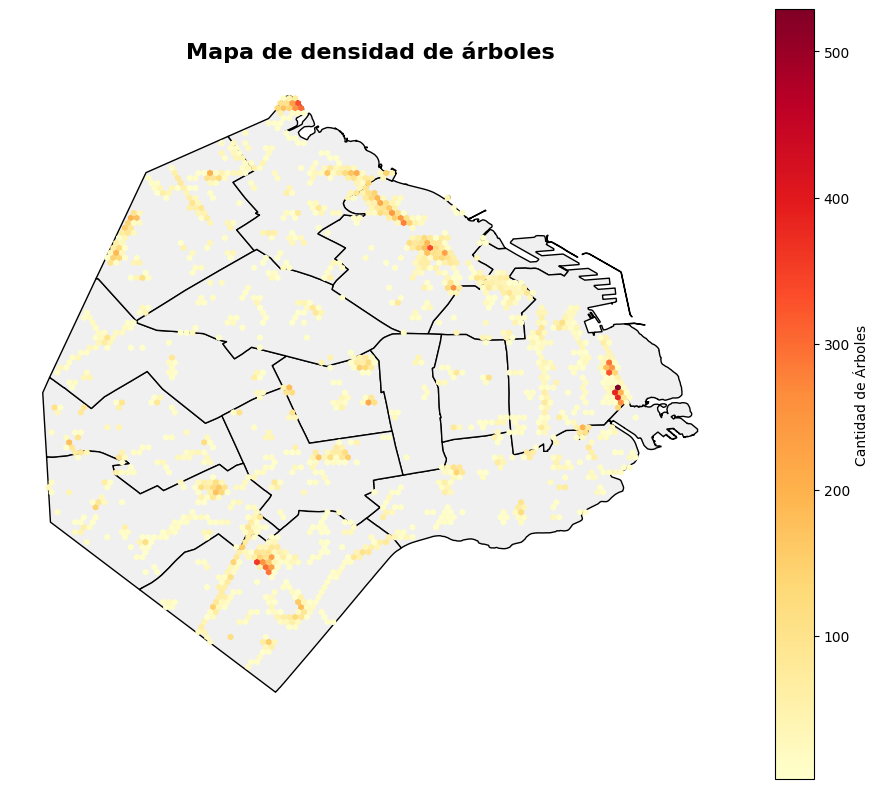

In [77]:

fig, ax = plt.subplots(figsize=(10, 8))

comunas_gdf.plot(ax=ax, color="#F0F0F0", edgecolor='black', linewidth=1)

plt.hexbin(
    arboles['long'],
    arboles['lat'],
    gridsize=100,
    cmap='YlOrRd',
    mincnt=2,
    edgecolors='none'
)

plt.colorbar(label='Cantidad de Árboles')
plt.title('Mapa de densidad de árboles', fontsize=16, fontweight='bold')
plt.tight_layout()
ax.set_axis_off()
plt.show()